In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [14]:
import pickle

data = pickle.load(open('./data/data.pkl', 'rb'))

X_train, y_train = data['X_train'], data['y_train']
X_test, y_test = data['X_test'], data['y_test']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(138855, 7, 6) (138855,) (41008, 7, 6) (41008,)


In [11]:
model = xgb.XGBClassifier()  # 创建一个 XGBoost 分类器
model.fit(X_train.reshape(X_train.shape[0], -1), y_train.reshape(-1, 1)) 

# 进行预测
predictions = model.predict(X_test.reshape(X_test.shape[0], -1))

# 模型性能评估
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.6416309012875536
Confusion Matrix:
 [[10395  9766]
 [ 4930 15917]]


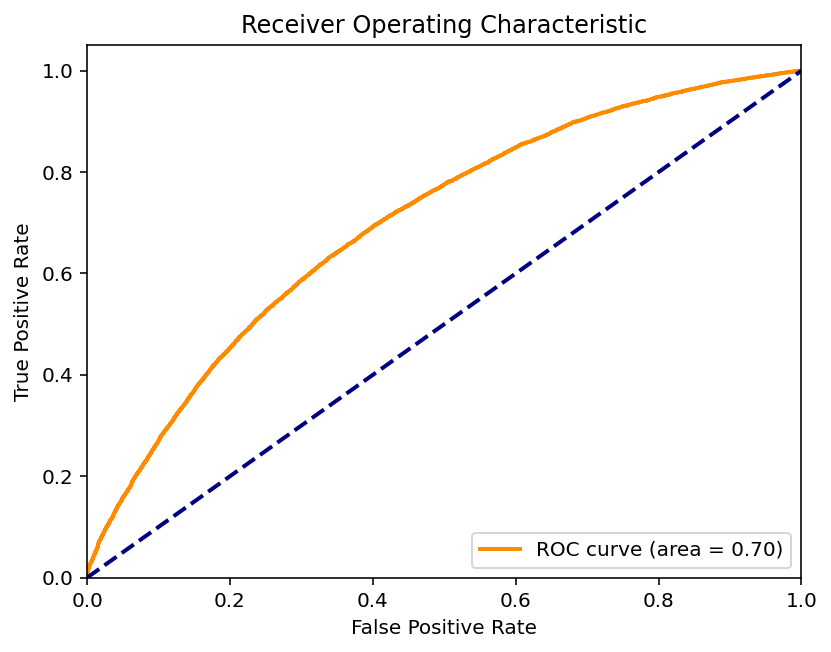

In [12]:
# 画出AUCROC曲线
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 计算ROC曲线
y_pred_proba = model.predict_proba(X_test.reshape(X_test.shape[0], -1))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(dpi=144)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()